In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

from pydmd import DMD
from pydmd.bopdmd import BOPDMD
from pydmd.plotter import plot_eigs
from pydmd.plotter import plot_summary
from pydmd.preprocessing.hankel import hankel_preprocessing

In [64]:
_ = pd.read_csv('cdii.csv').drop(columns=['Unnamed: 0'])
Xn = _.T.values
t = np.linspace(0,230, 24)

In [67]:
for i in np.random.choice(1807, size=10):
    print("Mean: ", np.mean(Xn[:,i]), " Std: ", np.std(Xn[:,]))

Mean:  -6.846375318521799e-16  Std:  1.0
Mean:  1.0177044392397268e-16  Std:  1.0
Mean:  5.736152293896642e-16  Std:  1.0
Mean:  1.8503717077085943e-16  Std:  1.0
Mean:  -5.551115123125783e-17  Std:  1.0
Mean:  3.1456319031046104e-16  Std:  1.0
Mean:  -4.718447854656915e-16  Std:  1.0
Mean:  3.515706244646329e-16  Std:  1.0
Mean:  -6.245004513516506e-16  Std:  1.0
Mean:  1.850371707708594e-17  Std:  1.0


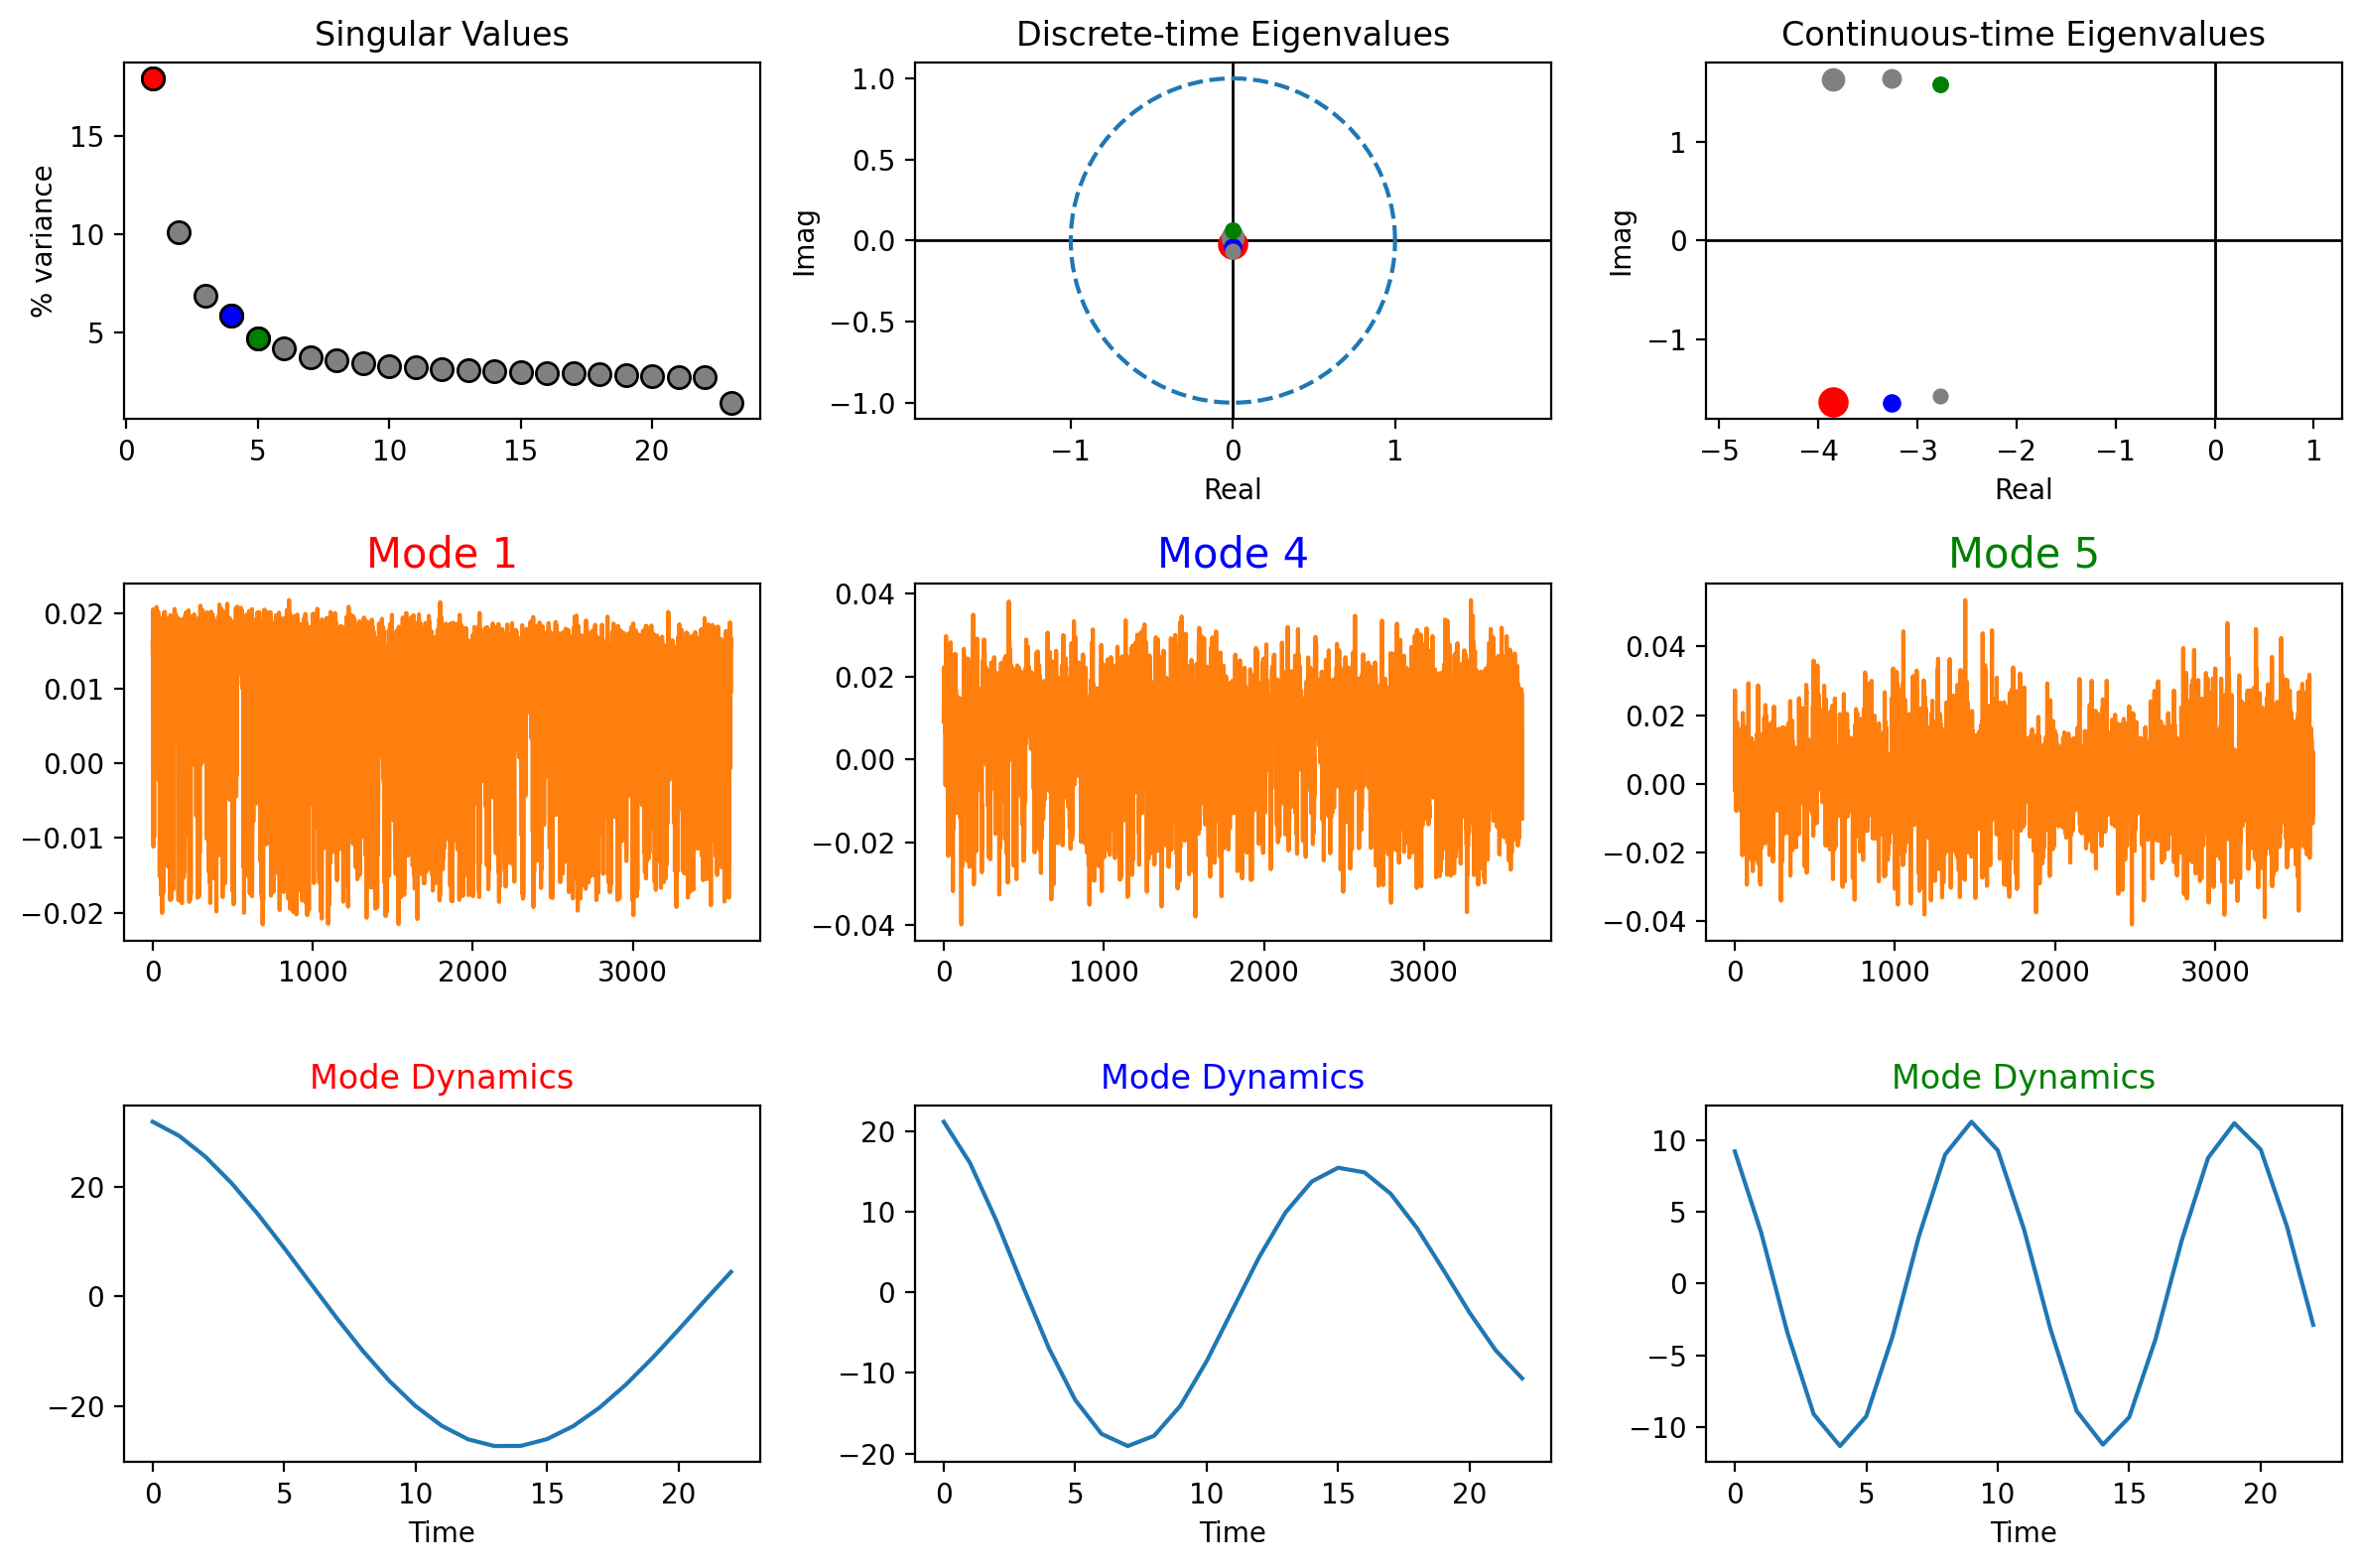

Computed frequencies:
[-0.   +0.063j -0.   -0.063j -0.001+0.021j -0.001-0.021j -0.003+0.038j
 -0.003-0.038j]


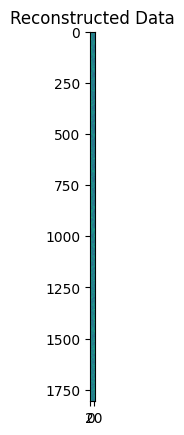

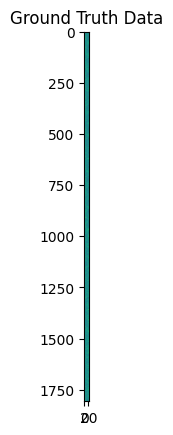

In [123]:
delay_optdmd = hankel_preprocessing(BOPDMD(svd_rank=6, num_trials=0), d=2)

delay_optdmd.fit(Xn.T, t=t[1:])
plot_summary(delay_optdmd, index_modes=[0,3,4], order='F') # pick correct modes

print("Computed frequencies:")
print(np.round(delay_optdmd.eigs, decimals=3))
plt.title("Reconstructed Data")
plt.imshow(delay_optdmd.reconstructed_data.real)
plt.show()
plt.title("Ground Truth Data")
plt.imshow(Xn.T)
plt.show()

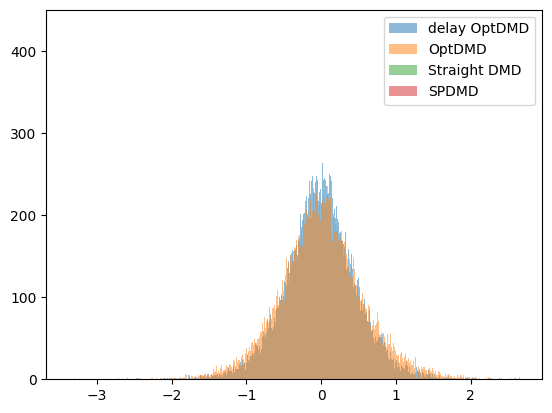

In [129]:
plt.hist((Xn.T-delay_optdmd.reconstructed_data.real).flatten(), bins=1000, alpha=0.5)
plt.hist((Xn.T-optdmd.reconstructed_data.real).flatten(), bins=1000, alpha=0.5)
plt.hist((Xn.T-std_dmd.reconstructed_data.real).flatten(), bins=1000, alpha=0.5)
plt.hist((Xn.T-spdmd_list[0].reconstructed_data.real).flatten(), bins=1000, alpha=0.5)
plt.legend(['delay OptDMD', 'OptDMD', 'Straight DMD', 'SPDMD'])
plt.show()

/usr/local/lib/python3.8/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2709814062172625.5. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/pydmd/bopdmd.py:751: UserWarning: Initial trial of Optimized DMD failed to converge. Consider re-adjusting your variable projection parameters with the varpro_opts_dict and consider setting verbose=True.
  warnings.warn(msg)


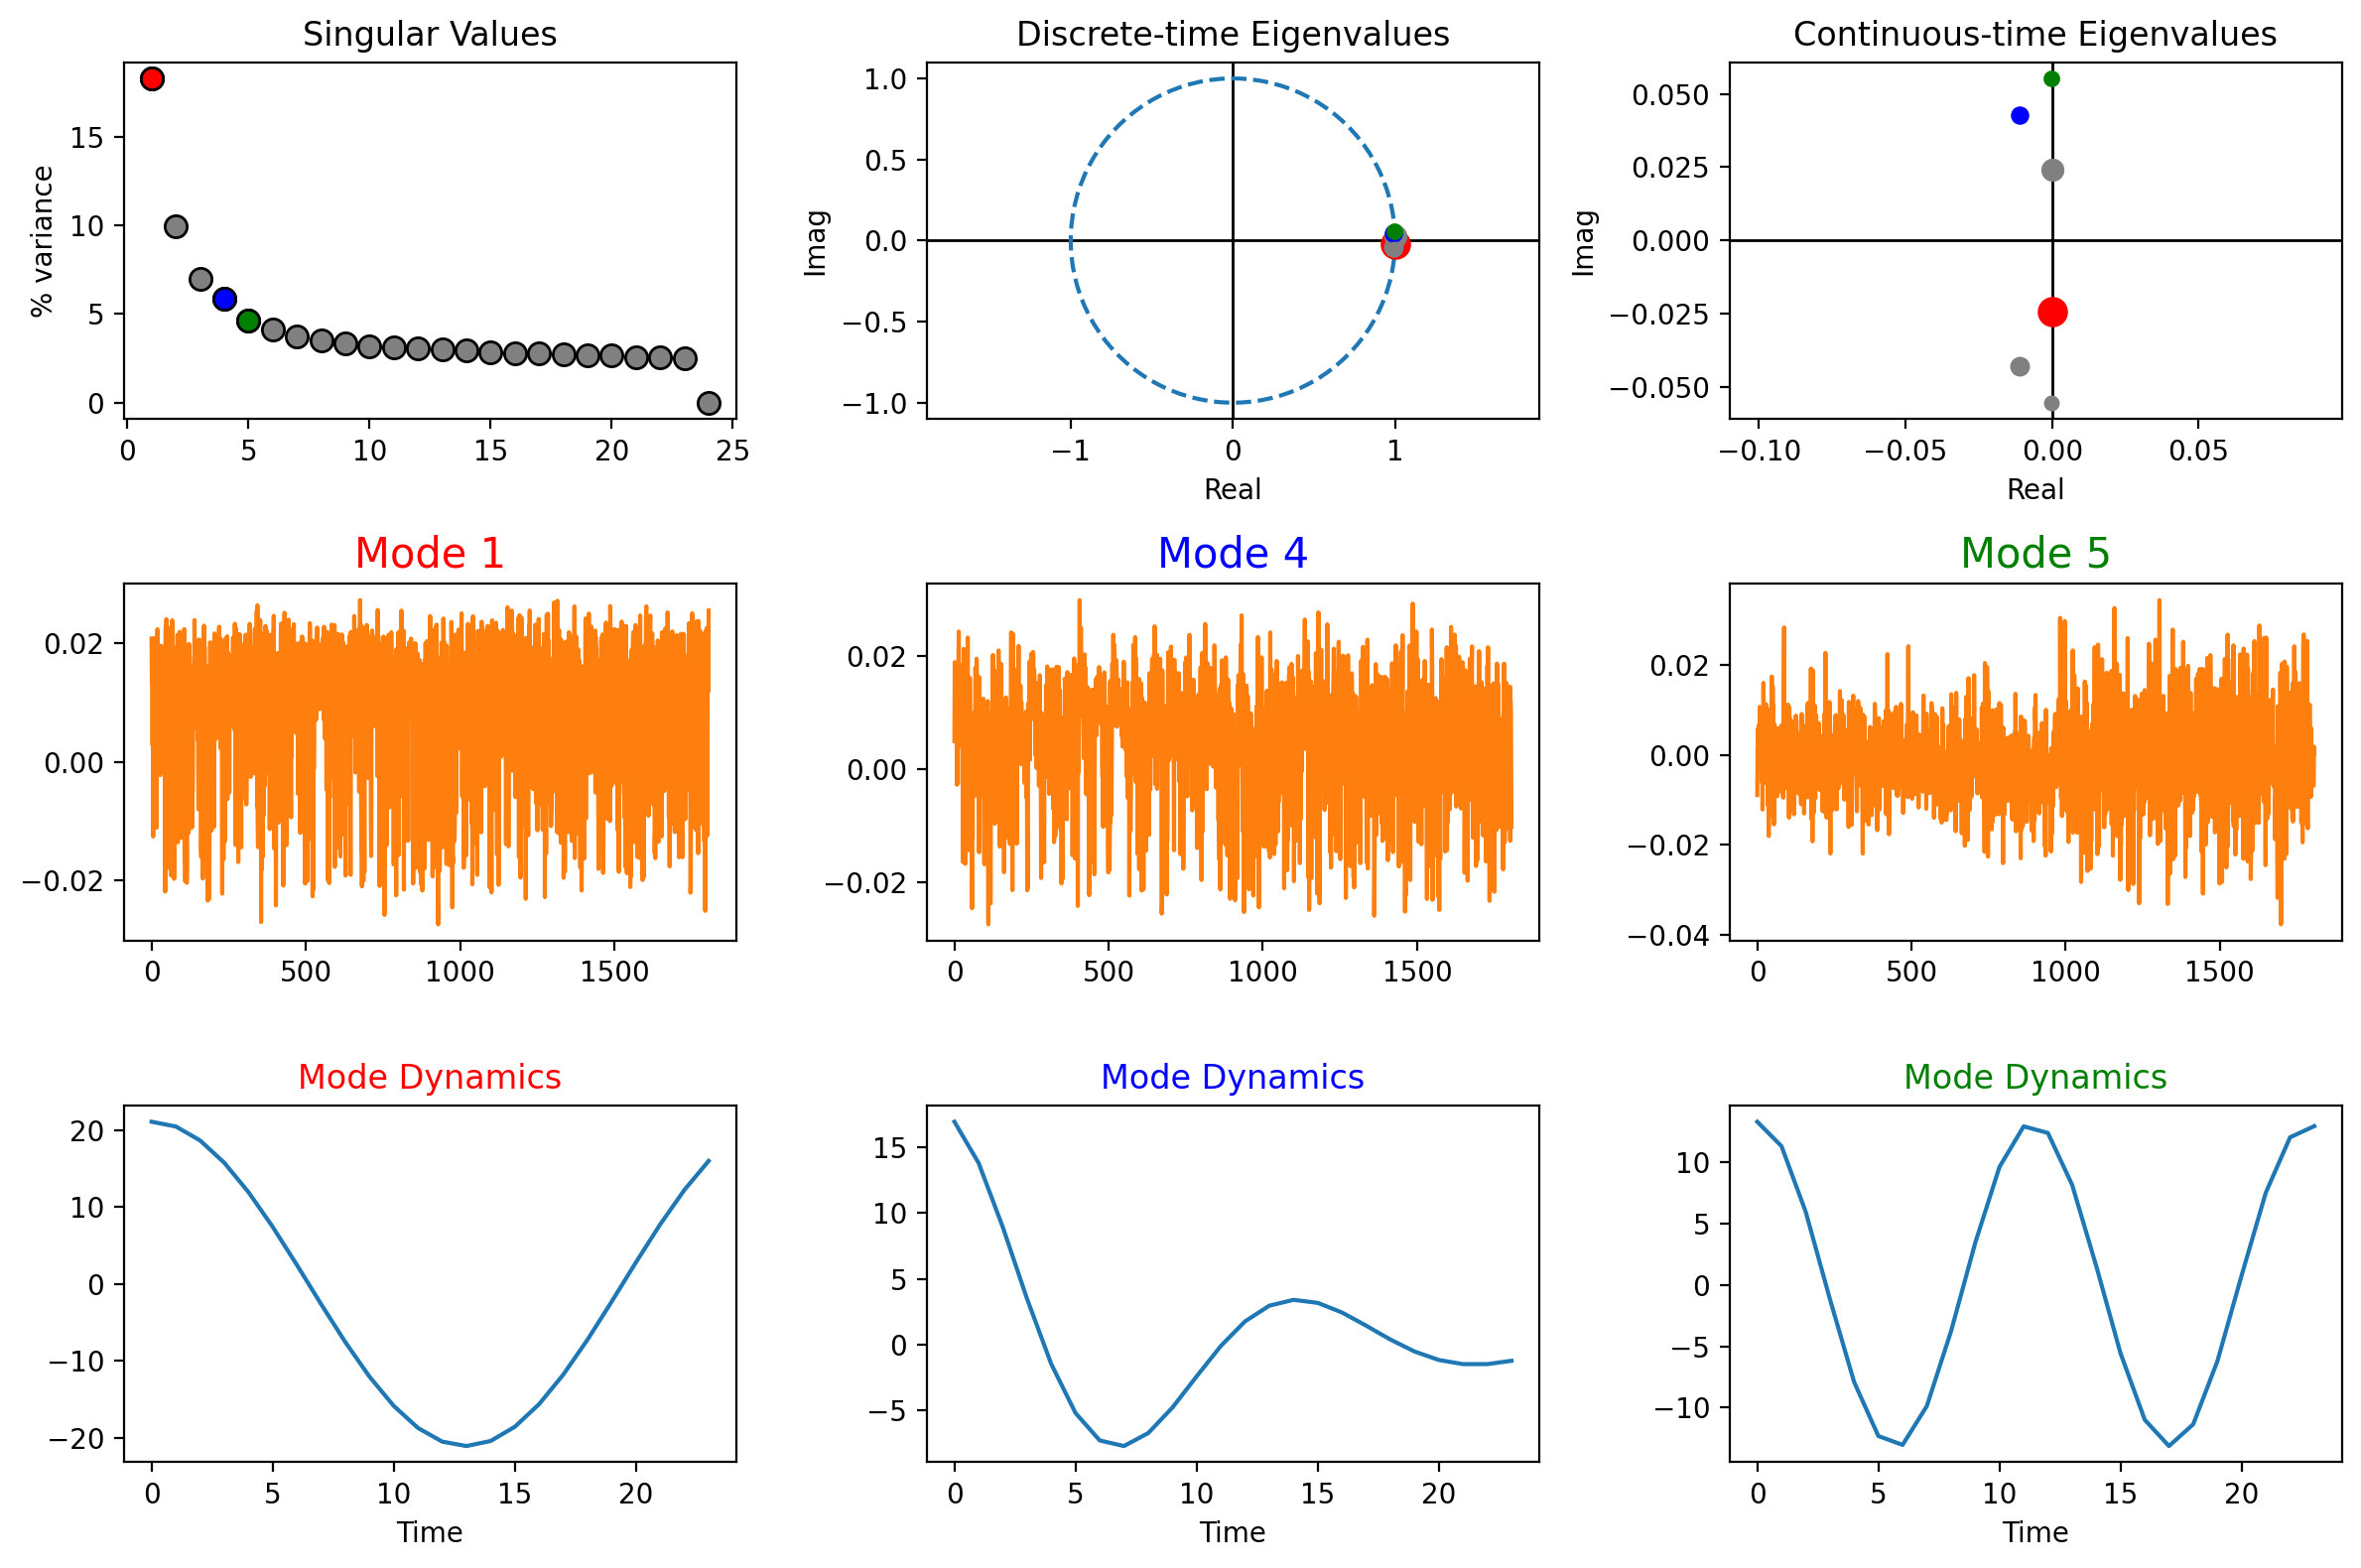

Computed frequencies:
[-0.   -0.055j -0.011-0.043j -0.   -0.024j -0.   +0.024j -0.011+0.043j
 -0.   +0.055j]


In [77]:
optdmd = BOPDMD(svd_rank=6, num_trials=100, eig_constraints={"stable", "conjugate_pairs"})
optdmd.fit(Xn.T, t)
plot_summary(optdmd, index_modes=[0,3,4], order='F')

print("Computed frequencies:")
print(np.round((optdmd.eigs), decimals=3))

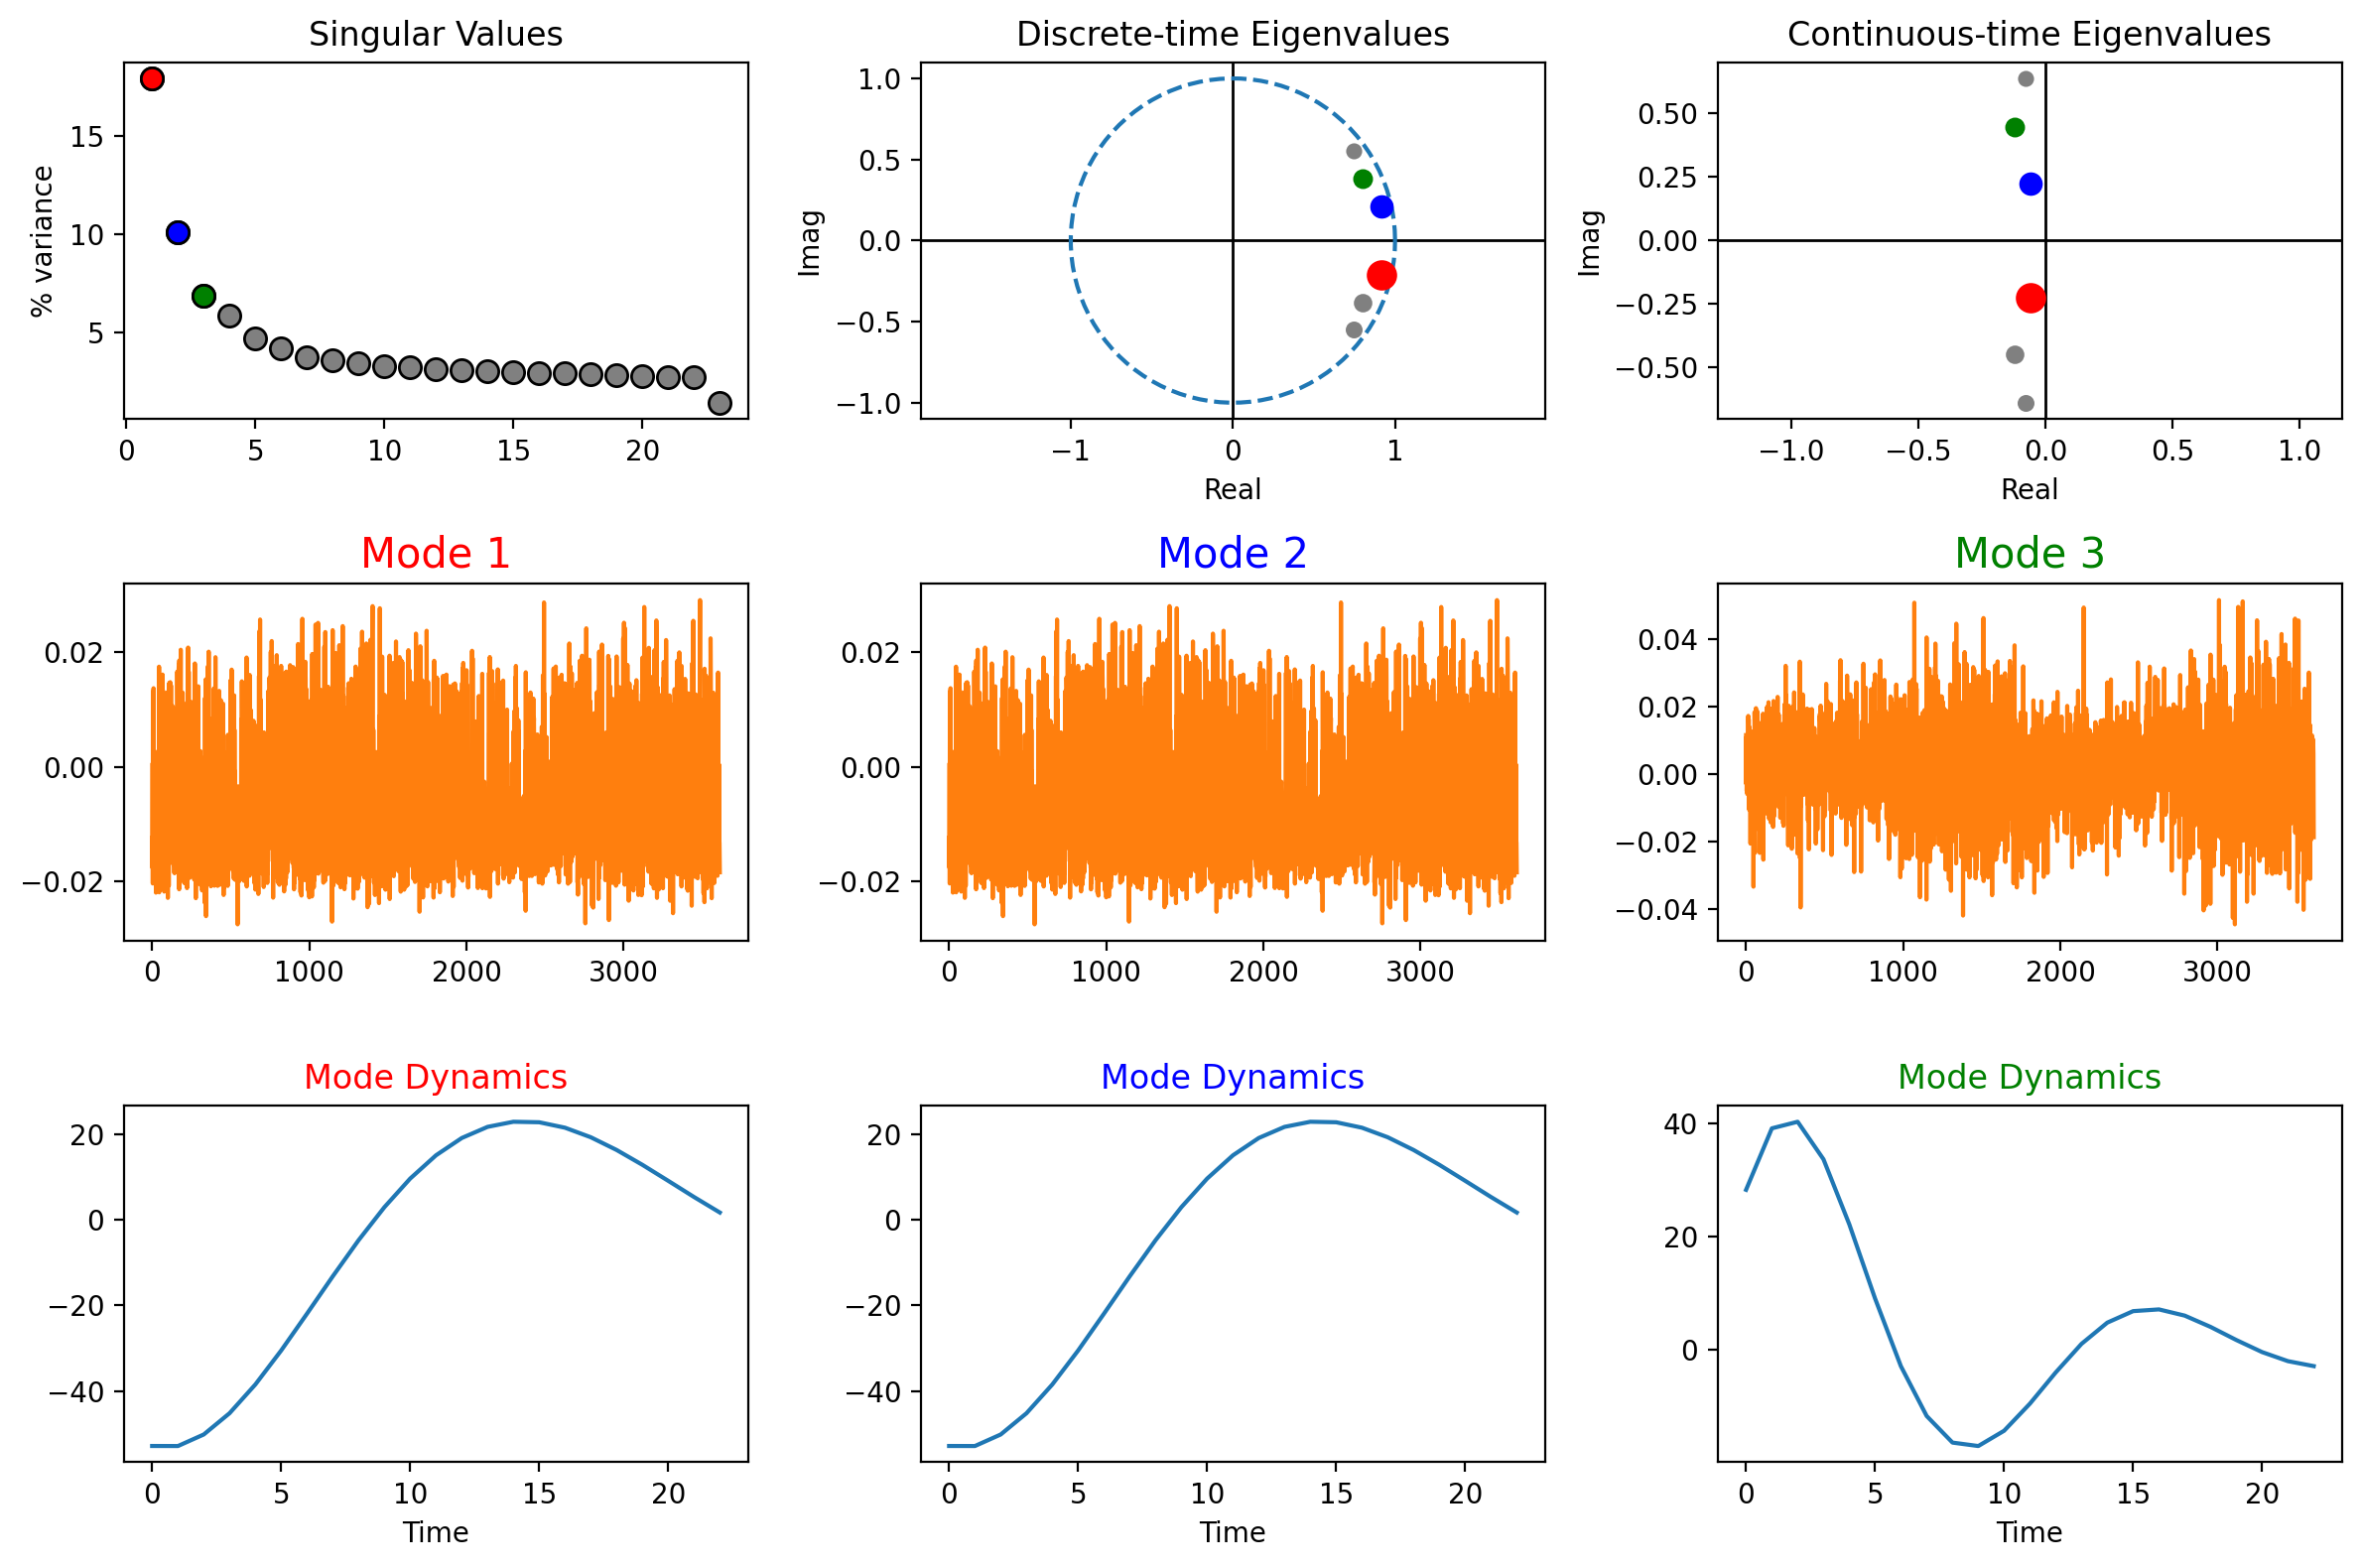

Computed frequencies:
[0.918+0.211j 0.918-0.211j 0.742+0.551j 0.742-0.551j 0.797+0.382j
 0.797-0.382j]


In [73]:
delay_dmd = hankel_preprocessing(DMD(svd_rank=6), d=2)
# Cut off a value of t to match the number of snapshots in the hankel matrix:
delay_dmd.fit(Xn.T)
plot_summary(delay_dmd)

print("Computed frequencies:")
print(np.round(delay_dmd.eigs, decimals=3))

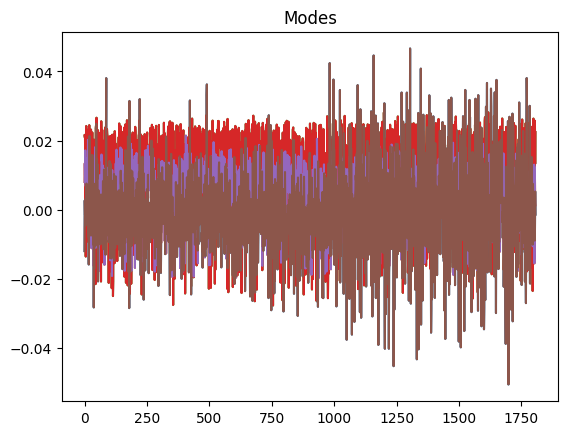

In [75]:
for mode in optdmd.modes.T:
    plt.plot(range(1807), mode.real)
    plt.title("Modes")
plt.show()

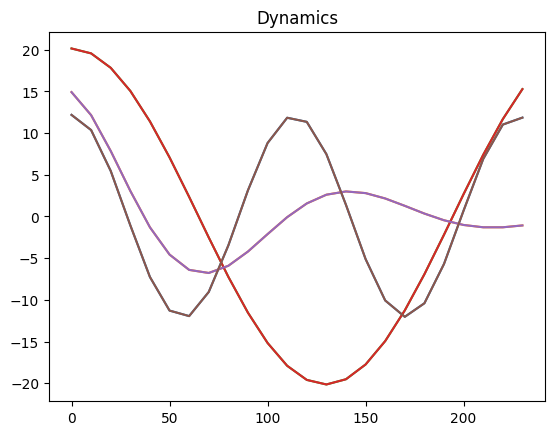

In [76]:
for dynamic in optdmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title("Dynamics")
plt.show()

In [79]:
from pydmd import SpDMD,DMD

gammas = [1.e-3,2,10,20,30,50,100,1000]


In [100]:
spdmd_list = [SpDMD(svd_rank=30,gamma=gm,rho=1.e4).fit(Xn.T) for gm in gammas]
std_dmd = DMD(svd_rank=30).fit(Xn.T)

/usr/local/lib/python3.8/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 2709814062172625.5. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


ADMM: 3 iterations
ADMM: 3 iterations
ADMM: 3 iterations
ADMM: 3 iterations
ADMM: 3 iterations
ADMM: 3 iterations
ADMM: 3 iterations
ADMM: 3 iterations


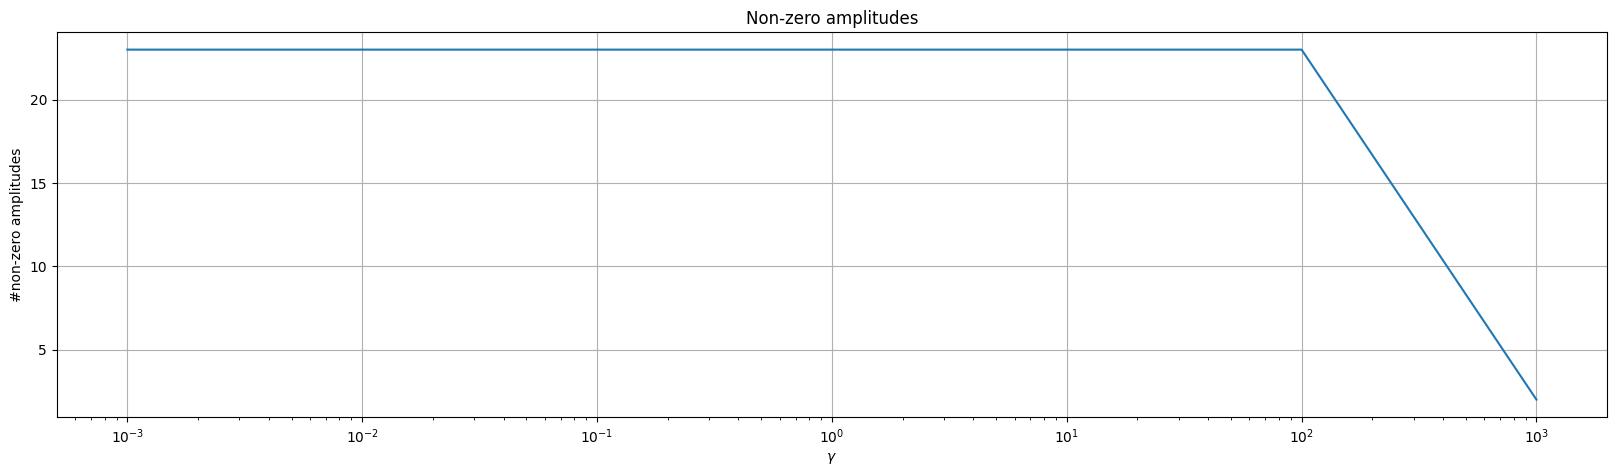

In [101]:
plt.figure(figsize=(20,5))

plt.plot(gammas, [np.count_nonzero(dmd.amplitudes) for dmd in spdmd_list])

plt.grid()
plt.xscale('log')

plt.title('Non-zero amplitudes')
plt.xlabel('$\gamma$')
plt.ylabel('#non-zero amplitudes')

plt.show()

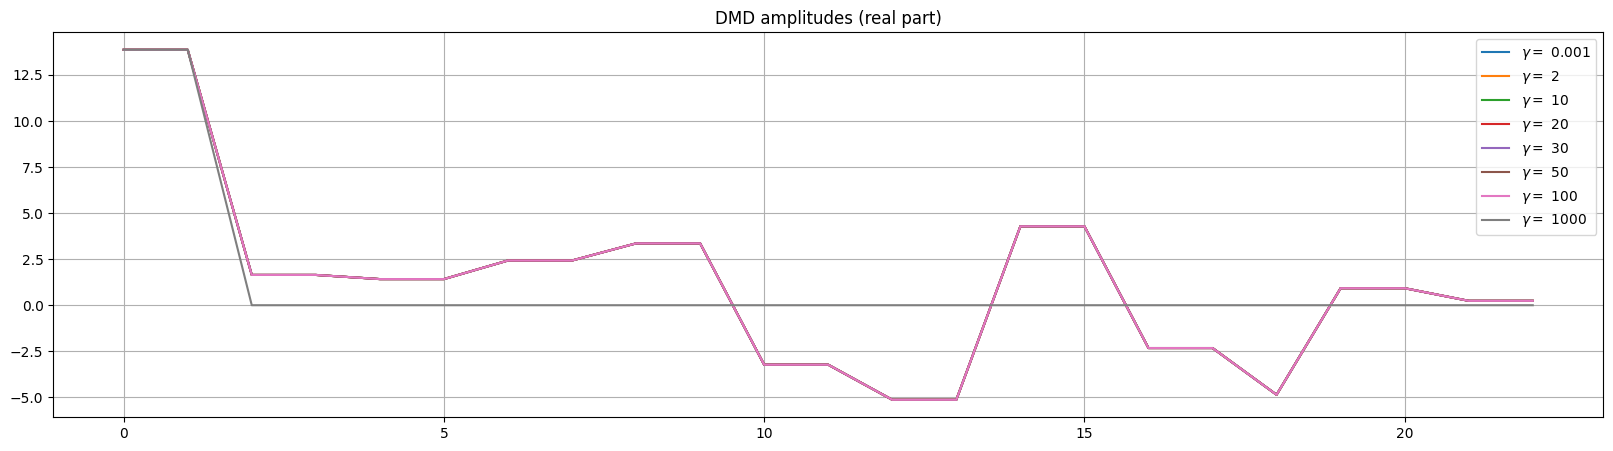

In [102]:
# plot amplitudes
plt.figure(figsize=(20,5))

for gm,a in zip(gammas,map(lambda dmd: dmd.amplitudes, spdmd_list)):
    plt.plot(a.real, label='$\gamma = $ {}'.format(gm))

plt.grid()
plt.legend()

plt.title('DMD amplitudes (real part)')

plt.show()

In [109]:
len(spdmd_list)

8

In [110]:
_ = spdmd_list[-1]

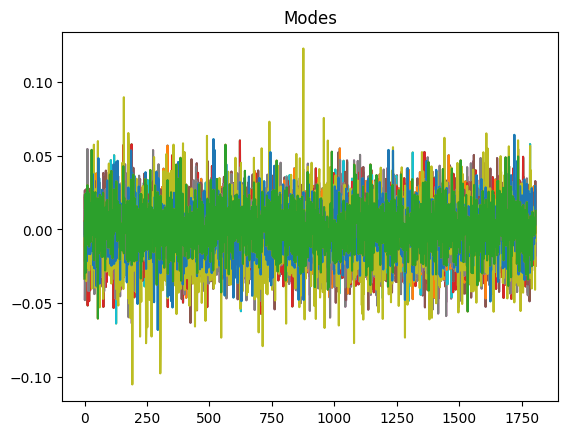

In [111]:
for mode in _.modes.T:
    plt.plot(range(1807), mode.real)
    plt.title("Modes")
plt.show()

/root/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/root/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6794: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


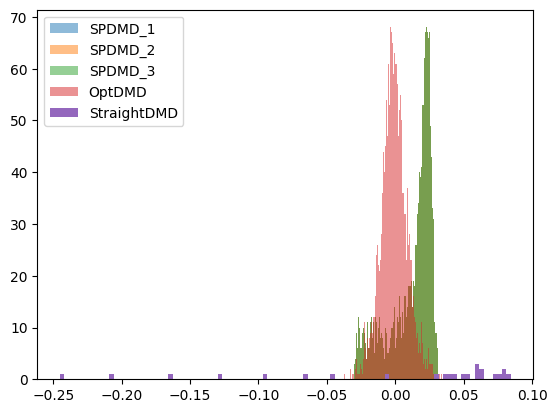

In [130]:
plt.hist(_.modes.T[0], bins=100, alpha=0.5)
plt.hist(spdmd_list[0].modes.T[0], bins=100, alpha=0.5)
plt.hist(spdmd_list[3].modes.T[0], bins=100, alpha=0.5)
plt.hist(optdmd.modes.T[0], bins=100, alpha=0.5)
plt.hist(dmd.modes.T[0], bins=100)
plt.legend(['SPDMD_1', 'SPDMD_2', 'SPDMD_3', 'OptDMD', 'StraightDMD'])

plt.show()

In [120]:
print(optdmd.eigs, ' ', optdmd.eigenvalues_std)


[-7.13218403e-05-0.05527602j -1.11006691e-02-0.04267161j
 -3.77761545e-15-0.02423008j -3.77761545e-15+0.02423008j
 -1.11006691e-02+0.04267161j -7.13218403e-05+0.05527602j]   [1.61309802e-09 1.47255029e-09 6.58544508e-10 6.58544508e-10
 1.47255029e-09 1.61309802e-09]
